In [1]:
%matplotlib widget
import DataAnalysisClasses.FinalCurve as fc
import json
import matplotlib.pyplot as plt
plt.style.use('dark_background')


# Load structure to visualize

In [2]:
with open(r"/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/DataAnalysisClasses/test3.json",
          "r") as read_file:
    data_in = json.load(read_file)

# Fling it into voxel structure from file

In [3]:
device_curve = fc.DeviceCurve(data_in)
device_curve.voxelize(100, 0.1)
total_nodes = device_curve.root_voxel.count_nodes()
total_points = device_curve.root_voxel.count_points()
print('Before')
print('Nodes: ', total_nodes)
print('Points: ', total_points)

Points to Voxelize:  328180
Before
Nodes:  218
Points:  328180


In [4]:
# Show final voxels wireframe

In [5]:
def list_of_lines_from_ranges(ranges_in):
            # self.range: Dict[str, float] = {'x_min': nan, 'x_max': nan,  # <x_min;x_max)
            #                             'y_min': nan, 'y_max': nan,  # <y_min;y_max)
            #                             'z_min': nan, 'z_max': nan}  # <z_min;z_max)
    line_list= [
        # x
        [ # y_min, z_min
        [ranges_in['x_min'],ranges_in['x_max']], # X 
        [ranges_in['y_min'],ranges_in['y_min']], # Y 
        [ranges_in['z_min'],ranges_in['z_min']]  # Z
        ],
        [ # y_max, z_min
        [ranges_in['x_min'],ranges_in['x_max']], # X 
        [ranges_in['y_max'],ranges_in['y_max']], # Y 
        [ranges_in['z_min'],ranges_in['z_min']]  # Z
        ],
        [ # y_min, z_max
        [ranges_in['x_min'],ranges_in['x_max']], # X 
        [ranges_in['y_min'],ranges_in['y_min']], # Y 
        [ranges_in['z_max'],ranges_in['z_max']]  # Z
        ],
        [ # y_max, z_max
        [ranges_in['x_min'],ranges_in['x_max']], # X 
        [ranges_in['y_max'],ranges_in['y_max']], # Y 
        [ranges_in['z_max'],ranges_in['z_max']]  # Z
        ],
        # y
        [ # x_min, z_min
        [ranges_in['x_min'],ranges_in['x_min']], # X 
        [ranges_in['y_min'],ranges_in['y_max']], # Y 
        [ranges_in['z_min'],ranges_in['z_min']]  # Z
        ],
        [ # x_max, z_min
        [ranges_in['x_max'],ranges_in['x_max']], # X 
        [ranges_in['y_min'],ranges_in['y_max']], # Y 
        [ranges_in['z_min'],ranges_in['z_min']]  # Z
        ],
        [ # x_min, z_max
        [ranges_in['x_min'],ranges_in['x_min']], # X 
        [ranges_in['y_min'],ranges_in['y_max']], # Y 
        [ranges_in['z_max'],ranges_in['z_max']]  # Z
        ],
        [ # x_max, z_max
        [ranges_in['x_max'],ranges_in['x_max']], # X 
        [ranges_in['y_min'],ranges_in['y_max']], # Y 
        [ranges_in['z_max'],ranges_in['z_max']]  # Z
        ],
        # z
        [ # x_min, y_min
        [ranges_in['x_min'],ranges_in['x_min']], # X 
        [ranges_in['y_min'],ranges_in['y_min']], # Y 
        [ranges_in['z_min'],ranges_in['z_max']]  # Z
        ],
        [ # x_max, y_min
        [ranges_in['x_max'],ranges_in['x_max']], # X 
        [ranges_in['y_min'],ranges_in['y_min']], # Y 
        [ranges_in['z_min'],ranges_in['z_max']]  # Z
        ],
        [ # x_min, y_max
        [ranges_in['x_min'],ranges_in['x_min']], # X 
        [ranges_in['y_max'],ranges_in['y_max']], # Y 
        [ranges_in['z_min'],ranges_in['z_max']]  # Z
        ],
        [ # x_max, y_max
        [ranges_in['x_max'],ranges_in['x_max']], # X 
        [ranges_in['y_max'],ranges_in['y_max']], # Y 
        [ranges_in['z_min'],ranges_in['z_max']]  # Z
        ]
    ]
    return line_list

In [6]:
# Extract voxel ranges
voxel_ranges = device_curve.export_voxels_wireframe()
lines_wireframe = []
# turn them to lines
for ran in voxel_ranges:
    lines_wireframe.append({'level': ran['level'], 'lines':list_of_lines_from_ranges(ran['ranges'])})


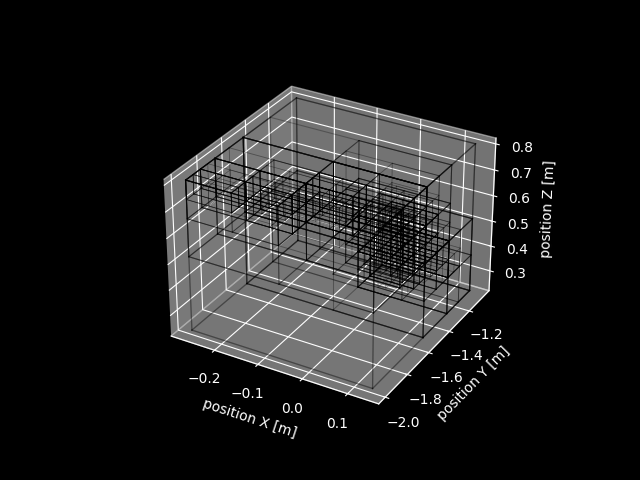

In [7]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlabel('position X [m]')
ax1.set_ylabel('position Y [m]')
ax1.set_zlabel('position Z [m]')
#plt.close()
num = 1
for vox in lines_wireframe:
    if vox['level']<20:
        for line in vox['lines']:
            ax1.plot(line[0], line[1], line[2], 'k-',linewidth=1-(0.05*vox['level']),alpha=0.2+(0.02*vox['level']))
        #plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_1/an_1_' +str(num).zfill(4),dpi=600, format = 'svg')
        num = num+1
#ax1.plot([0,1],[0,1],[0,1])


#plt.draw()
#plt.show()

In [8]:
device_curve.root_voxel.drop_unneeded_nodes()
total_nodes = device_curve.root_voxel.count_nodes()
total_points = device_curve.root_voxel.count_points()
print('After')
print('Nodes: ', total_nodes)
print('Points: ', total_points)

After
Nodes:  215
Points:  328180


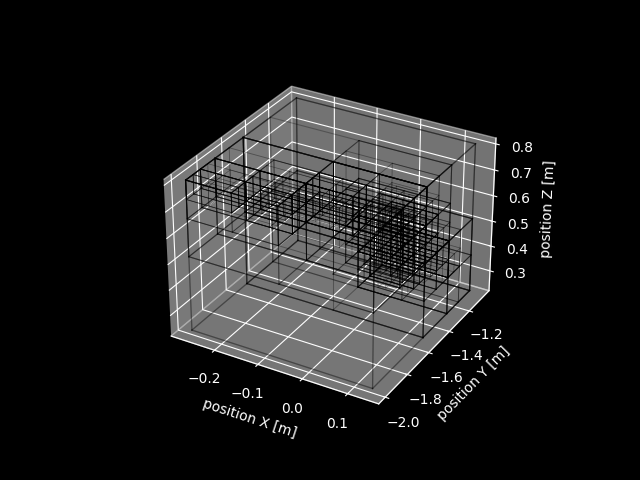

In [9]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')
ax2.set_xlabel('position X [m]')
ax2.set_ylabel('position Y [m]')
ax2.set_zlabel('position Z [m]')
#plt.close()
num = 1
for vox in lines_wireframe:
    if vox['level']<20:
        for line in vox['lines']:
            ax2.plot(line[0], line[1], line[2], 'k-',linewidth=1-(0.05*vox['level']),alpha=0.2+(0.02*vox['level']))
        #plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_2/an_2_' +str(num).zfill(4),dpi=600, format = 'svg')
        num = num+1
#ax1.plot([0,1],[0,1],[0,1])


#plt.draw()
#plt.show()

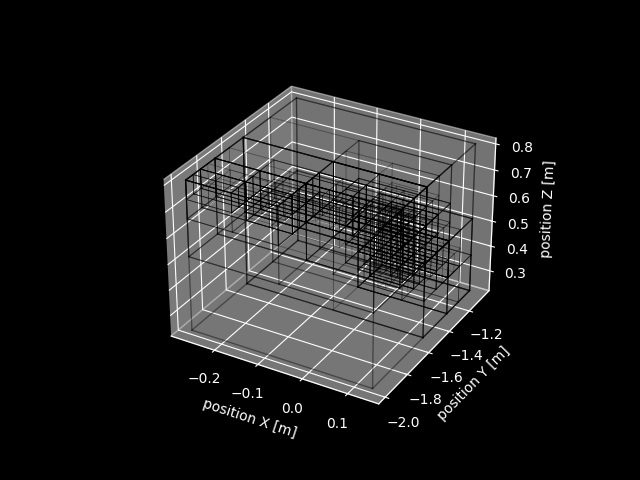

In [10]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(projection='3d')
ax3.set_xlabel('position X [m]')
ax3.set_ylabel('position Y [m]')
ax3.set_zlabel('position Z [m]')
#plt.close()
# Find_highest_level_number
lv_max=0
for vox in lines_wireframe:
    if vox['level']>lv_max:
        lv_max = vox['level']


num = 1
for i in range(1,lv_max+1):
    for vox in lines_wireframe:
        if vox['level']==i:
            for line in vox['lines']:
                ax3.plot(line[0], line[1], line[2], 'k-',linewidth=1-(0.05*vox['level']),alpha=0.2+(0.02*vox['level']))
    #plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_3/an_3_' +str(num).zfill(4),dpi=600, format = 'svg')
    num = num+1

/tmp/ipykernel_30321/1549182548.py:9: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax3.w_xaxis.line.set_color((0.0, 0.0, 0.0, 1.0))
/tmp/ipykernel_30321/1549182548.py:10: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax3.w_yaxis.line.set_color((0.0, 0.0, 0.0, 1.0))


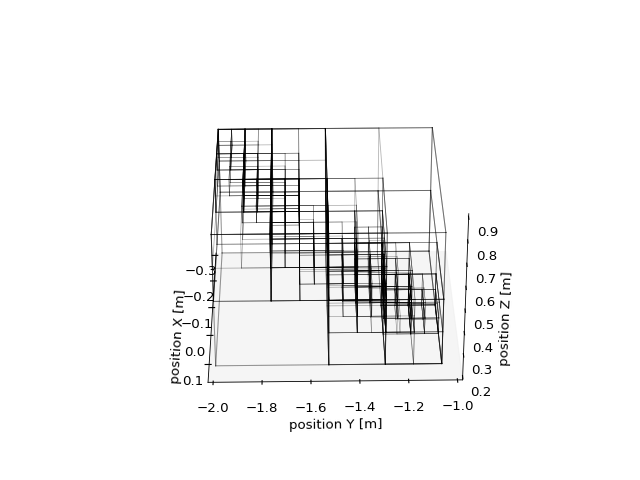

In [11]:
plt.style.use('classic')
fig3 = plt.figure()
ax3 = fig3.add_subplot(projection='3d')
ax3.set_xlabel('position X [m]')
ax3.set_ylabel('position Y [m]')
ax3.set_zlabel('position Z [m]')
ax3.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax3.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax3.w_xaxis.line.set_color((0.0, 0.0, 0.0, 1.0)) 
ax3.w_yaxis.line.set_color((0.0, 0.0, 0.0, 1.0)) 
ax3.grid(False)
fig3.patch.set_facecolor('white')
ax3.patch.set_facecolor('white')
ax3.xaxis.label.set_color('black')
ax3.yaxis.label.set_color('black')
ax3.tick_params(axis='x', colors='black')
ax3.tick_params(axis='y', colors='black')
ax3.tick_params(axis='z', colors='black')
ax3.spines['bottom'].set_color('red')
#plt.close()
# Find_highest_level_number
lv_max=0
for vox in lines_wireframe:
    if vox['level']>lv_max:
        lv_max = vox['level']


num = 1
for i in range(1,lv_max+1):
    for vox in lines_wireframe:
        if vox['level']==i:
            for line in vox['lines']:
                ax3.plot(line[0], line[1], line[2], 'k-',linewidth=1-(0.05*vox['level']),alpha=0.2+(0.02*vox['level']))
    num = 1
    for angle in range(0, 360):
        ax3.view_init(30, angle)
        #plt.draw()
        #plt.pause(.001)
        #plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_4/'+str(i)+'/an_4_' +str(num).zfill(4),dpi=600, format = 'svg')
        num = num+1

/tmp/ipykernel_30321/629954235.py:9: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax4.w_xaxis.line.set_color((0.0, 0.0, 0.0, 1.0))
/tmp/ipykernel_30321/629954235.py:10: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax4.w_yaxis.line.set_color((0.0, 0.0, 0.0, 1.0))
/tmp/ipykernel_30321/629954235.py:37: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax4.w_xaxis.line.set_color((0.0, 0.0, 0.0, 1.0))
/tmp/ipykernel_30321/629954235.py:38: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax4.w_yaxis.line.set_color((0.0, 0.0, 0.0, 1.0))


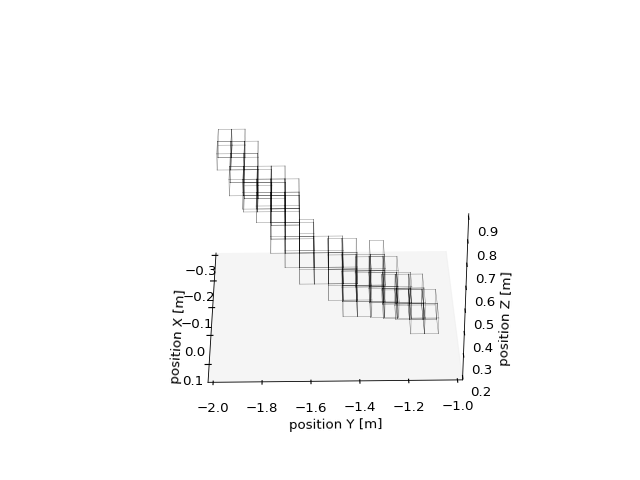

In [12]:
plt.style.use('classic')
fig4 = plt.figure()
ax4 = fig4.add_subplot(projection='3d')
ax4.set_xlabel('position X [m]')
ax4.set_ylabel('position Y [m]')
ax4.set_zlabel('position Z [m]')
ax4.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax4.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax4.w_xaxis.line.set_color((0.0, 0.0, 0.0, 1.0)) 
ax4.w_yaxis.line.set_color((0.0, 0.0, 0.0, 1.0)) 
ax4.grid(False)
fig4.patch.set_facecolor('white')
ax4.patch.set_facecolor('white')
ax4.xaxis.label.set_color('black')
ax4.yaxis.label.set_color('black')
ax4.tick_params(axis='x', colors='black')
ax4.tick_params(axis='y', colors='black')
ax4.tick_params(axis='z', colors='black')
ax4.spines['bottom'].set_color('red')
#plt.close()
# Find_highest_level_number
lv_max=0
for vox in lines_wireframe:
    if vox['level']>lv_max:
        lv_max = vox['level']


num = 1
for i in range(1,lv_max+1):
    # komenda wyczyszczenia wykresu
    ax4.cla()
    ax4.set_xlabel('position X [m]')
    ax4.set_ylabel('position Y [m]')
    ax4.set_zlabel('position Z [m]')
    ax4.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax4.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax4.w_xaxis.line.set_color((0.0, 0.0, 0.0, 1.0)) 
    ax4.w_yaxis.line.set_color((0.0, 0.0, 0.0, 1.0)) 
    ax4.grid(False)
    fig4.patch.set_facecolor('white')
    ax4.patch.set_facecolor('white')
    ax4.xaxis.label.set_color('black')
    ax4.yaxis.label.set_color('black')
    ax4.tick_params(axis='x', colors='black')
    ax4.tick_params(axis='y', colors='black')
    ax4.tick_params(axis='z', colors='black')
    ax4.spines['bottom'].set_color('red')
    
    
    for vox in lines_wireframe:
        if vox['level']==i:
            for line in vox['lines']:
                ax4.plot(line[0], line[1], line[2], 'k-',linewidth=1-(0.05*vox['level']),alpha=0.2+(0.02*vox['level']))
    num = 1
    for angle in range(0, 360):
        ax4.view_init(30, angle)
        #plt.draw()
        #plt.pause(.001)
        #plt.savefig('/media/adamw/DATA/Projekty/Praca_mgr/scan_3d_MGR/gui_server/Animations/Voxelization_5/'+str(i)+'/an_5_' +str(num).zfill(4),dpi=600, format = 'svg')
        num = num+1

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']